In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AugmentedExercises.csv")
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,Movement,MovementType,Intensity,InjuryRisk,SecondaryMuscles
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,core,Isolation,High,Low,NaN
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,core,Isolation,High,Low,NaN
2,Dumbbell V-Sit Cross Jab,The dumbbell V-sit cross jab is a hybrid movem...,Strength,Abdominals,Dumbbell,Intermediate,9.3,core,Isolation,Medium,Low,NaN
3,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3,core,Isolation,Medium,Low,Obliques
4,Landmine twist,The landmine twist is a rotational abdominal m...,Strength,Abdominals,Other,Intermediate,9.5,core,Isolation,Low,Low,Obliques


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoders = {}
categorical_cols = ["Type", "BodyPart", "Equipment", "Level", "Movement", "MovementType", "Intensity", "InjuryRisk", "SecondaryMuscles"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [6]:
features = ["Type", "BodyPart", "Equipment", "Level", "Rating", "Movement", "MovementType", "Intensity", "InjuryRisk", "SecondaryMuscles"]
pca = PCA(n_components=2)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features)
    ]
)

X_processed = preprocessor.fit_transform(df)

X_pca = pca.fit_transform(X_processed)  # Convert sparse matrix if needed

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.18812376 0.15221798]


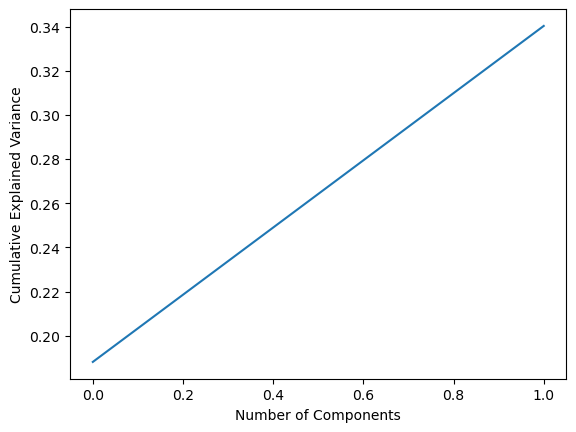

In [7]:
# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

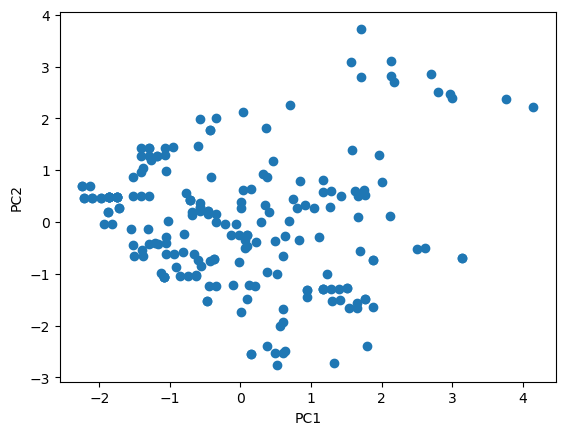

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

In [9]:
from sklearn.cluster import KMeans

C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

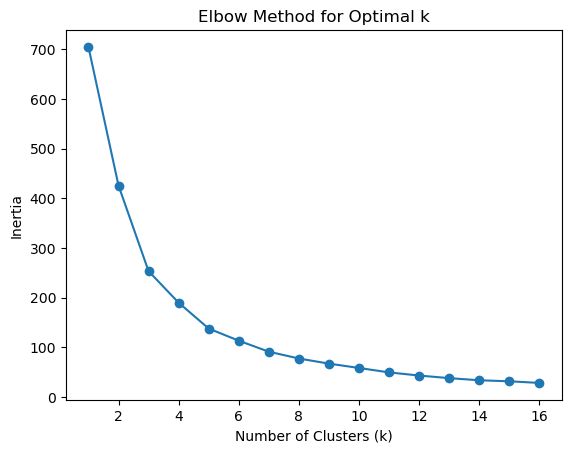

In [10]:
inertia = []
k_range = range(1, 17)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [33]:
# Apply K-Means with k=6
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_pca)

# Show some clustered exercises
df[["Title", "Type", "BodyPart", "Equipment", "Level", "Rating", "Cluster"]].head(10)

C:\Users\nahia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Title,Type,BodyPart,Equipment,Level,Rating,Cluster
0,Barbell roll-out,Strength,Abdominals,Barbell,Intermediate,8.9,1
1,Barbell Ab Rollout - On Knees,Strength,Abdominals,Barbell,Intermediate,8.9,1
2,Dumbbell V-Sit Cross Jab,Strength,Abdominals,Dumbbell,Intermediate,9.3,1
3,Dumbbell spell caster,Strength,Abdominals,Dumbbell,Beginner,9.3,1
4,Landmine twist,Strength,Abdominals,Other,Intermediate,9.5,1
5,Suspended ab fall-out,Strength,Abdominals,Other,Intermediate,9.3,1
6,Decline reverse crunch,Strength,Abdominals,Other,Intermediate,9.2,1
7,Weighted Crunches,Strength,Abdominals,Other,Intermediate,8.9,1
8,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,1
9,Otis-Up,Strength,Abdominals,Other,Intermediate,8.8,1


In [12]:
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

In [37]:
df[df["Cluster"]==3]

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,Movement,MovementType,Intensity,InjuryRisk,SecondaryMuscles,Cluster
55,Barbell Bench Press - Medium Grip,The bench press is a compound exercise that bu...,Strength,Chest,Barbell,Intermediate,9.0,push,Compound,High,Low,Triceps,3
57,Wide-grip bench press,The wide-grip bench press is a compound exerci...,Strength,Chest,Barbell,Beginner,8.9,push,Compound,High,Low,Triceps,3
58,Barbell Incline Bench Press Medium-Grip,The incline bench press is an upper body compo...,Strength,Chest,Barbell,Intermediate,8.8,push,Compound,High,Low,NaN,3
88,Barbell Deadlift,The barbell deadlift is a compound exercise us...,Strength,Hamstrings,Barbell,Intermediate,9.4,legs,Compound,High,Low,NaN,3
89,Sumo deadlift,The sumo deadlift is a compound movement in wh...,Powerlifting,Hamstrings,Barbell,Beginner,9.3,legs,Compound,High,Low,NaN,3
105,Barbell deficit deadlift,The barbell deficit deadlift is a compound exe...,Powerlifting,Lower Back,Barbell,Beginner,9.4,core,Compound,High,Low,NaN,3
107,Reverse-grip bent-over row,The reverse-grip bent-over row is a compound e...,Strength,Middle Back,Barbell,Intermediate,9.2,pull,Compound,High,Low,NaN,3
109,Bent Over Barbell Row,The barbell bent-over row is a compound exerci...,Strength,Middle Back,Barbell,Intermediate,8.7,pull,Compound,High,Low,NaN,3
123,Barbell Full Squat,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Intermediate,9.4,legs,Compound,High,Low,NaN,3
129,Barbell Squat,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Intermediate,8.9,legs,Compound,High,Low,NaN,3
